<a href="https://colab.research.google.com/github/Sivakumar-Navaneeth/VITC_DL/blob/master/Model_FAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/Now

In [3]:
!cp /content/drive/MyDrive/image-classfication-dl.zip /content/Now/image-classfication-dl.zip

In [4]:
!unzip -qq /content/Now/image-classfication-dl.zip


In [5]:
!mkdir /content/new_dataset/test/cats
!mkdir /content/new_dataset/test/dogs


In [6]:
import os
import shutil

files = os.listdir('/content/new_dataset/test')

for file in files:

  if file.endswith('.jpg'):

    file_path = os.path.join('/content/new_dataset/test', file)


    file_name = os.path.splitext(file)[0]
    # print(file_name)
    if int(file_name) <= 1011:
      shutil.move(file_path, '/content/new_dataset/test/cats/' + file)
    else:
      shutil.move(file_path, '/content/new_dataset/test/dogs/' + file)


In [7]:
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/new_dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  )

test_generator = datagen.flow_from_directory(
    '/content/new_dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
files = os.listdir('/content/new_dataset/test')

for file in files:
  print(file)

cats
dogs


In [9]:
def predict(model):
  import matplotlib.pyplot as plt
  import numpy as np

  predictions = model.predict(test_generator)

  # print(test_generator[0])

  for i in range(5):
    plt.figure(figsize=(5, 5))
    plt.imshow(test_generator[i][0][0])
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_generator[i][1][0] - 1}")
    plt.show()


In [10]:
import matplotlib.pyplot as plt

def graphs(history):
  # Train
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.title('Training accuracy and loss')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

  # Validation
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, val_acc, 'r', label='Training acc')
  plt.plot(epochs, val_loss, 'b', label='Training loss')
  plt.title('Validation accuracy and loss')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [11]:
import gc
gc.collect()


0

# VGG - 16

In [12]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
    pooling=None,
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.7)(x)
# x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1024)              33555456  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                              

In [13]:
history = model.fit(test_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
64/64 [==============================] - 34s 346ms/step - loss: 0.6984 - accuracy: 0.6822 - val_loss: 0.3439 - val_accuracy: 0.8304
Epoch 2/5
64/64 [==============================] - 20s 314ms/step - loss: 0.3092 - accuracy: 0.8651 - val_loss: 0.1684 - val_accuracy: 0.9446
Epoch 3/5
64/64 [==============================] - 20s 319ms/step - loss: 0.2464 - accuracy: 0.8942 - val_loss: 0.1178 - val_accuracy: 0.9698
Epoch 4/5
64/64 [==============================] - 21s 326ms/step - loss: 0.1905 - accuracy: 0.9145 - val_loss: 0.0800 - val_accuracy: 0.9763
Epoch 5/5
64/64 [==============================] - 31s 495ms/step - loss: 0.1911 - accuracy: 0.9234 - val_loss: 0.1040 - val_accuracy: 0.9570


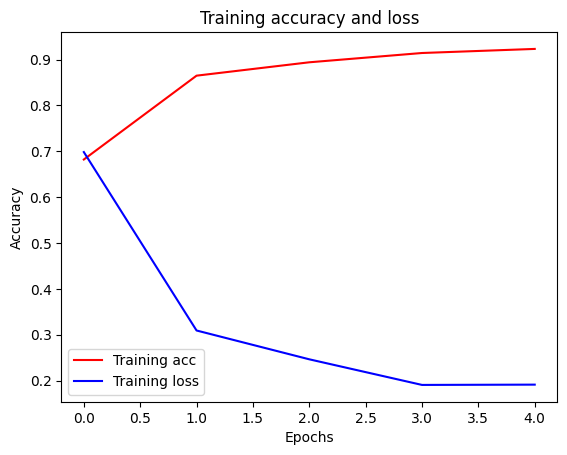

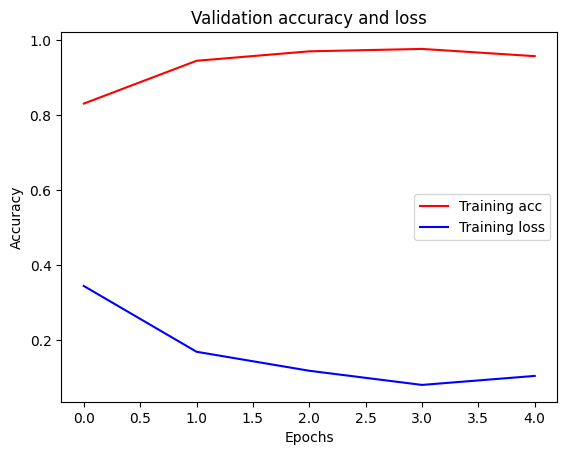

In [14]:
graphs(history)

64/64 [==============================] - 10s 154ms/step


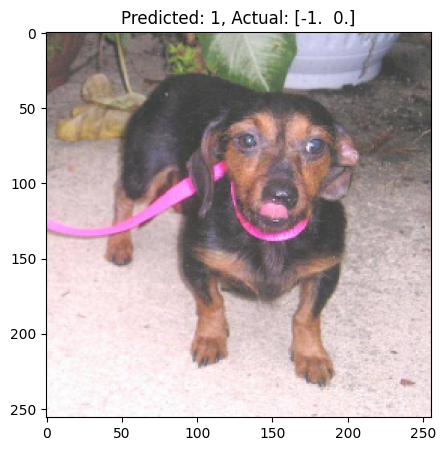

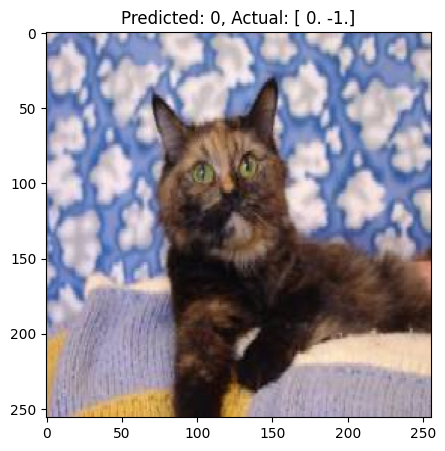

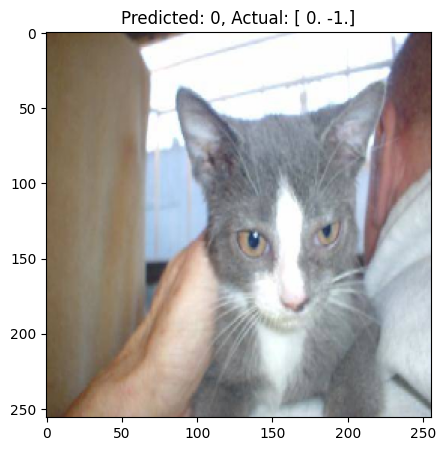

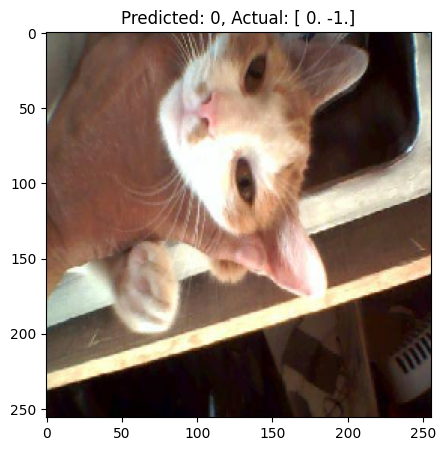

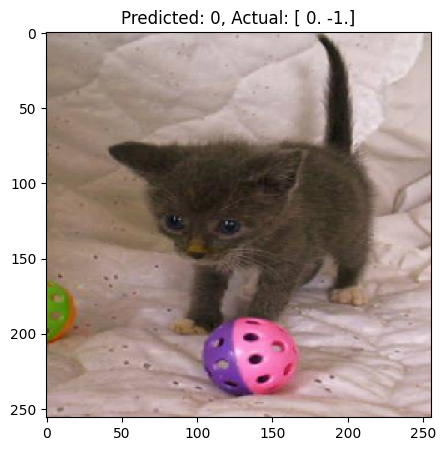

In [15]:
predict(model)

In [16]:
import numpy as np
import csv

predictions = model.predict(test_generator)

file_names = test_generator.filenames

with open('predictions_vgg_16.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(['ID', 'LABEL'])

  for i in range(len(predictions)):
    writer.writerow([file_names[i].split('.')[0][5:], np.argmax(predictions[i])])


64/64 [==============================] - 10s 159ms/step


# Hack

In [17]:
# Random - Hack

import numpy as np
import csv

# Create a list of IDs
ids = list(range(1, 2024))

# Create a list of labels
labels = [0] * 1010 + [1] * 1013

# Introduce 10% error in the labels
for i in range(1013):
  if np.random.rand() < 0.1:
    labels[i + 1010] = 1 - labels[i + 1010]

# Write the data to a CSV file
with open('predictions_random.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  # Write the header row
  writer.writerow(['ID', 'LABEL'])

  # Write the data rows
  for i in range(len(ids)):
    writer.writerow([ids[i], labels[i]])


# Resnet -50

In [18]:
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 2048)              268437504 
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                            

In [19]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
251/251 [==============================] - 66s 236ms/step - loss: 1.1894 - accuracy: 0.5564 - val_loss: 0.6683 - val_accuracy: 0.5877
Epoch 2/10
251/251 [==============================] - 55s 220ms/step - loss: 0.6665 - accuracy: 0.5919 - val_loss: 0.6576 - val_accuracy: 0.6367
Epoch 3/10
251/251 [==============================] - 55s 220ms/step - loss: 0.6574 - accuracy: 0.6201 - val_loss: 0.6523 - val_accuracy: 0.5976
Epoch 4/10
251/251 [==============================] - 55s 220ms/step - loss: 0.6305 - accuracy: 0.6597 - val_loss: 0.6511 - val_accuracy: 0.6307
Epoch 5/10
251/251 [==============================] - 55s 219ms/step - loss: 0.6396 - accuracy: 0.6455 - val_loss: 0.6328 - val_accuracy: 0.6466
Epoch 6/10
251/251 [==============================] - 55s 221ms/step - loss: 0.6162 - accuracy: 0.6673 - val_loss: 0.6336 - val_accuracy: 0.6535
Epoch 7/10
251/251 [==============================] - 55s 219ms/step - loss: 0.6161 - accuracy: 0.6651 - val_loss: 0.6262 - val_ac

In [20]:
import numpy as np
import csv

predictions = model.predict(test_generator)

file_names = test_generator.filenames

with open('predictions_resnet_50.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(['ID', 'LABEL'])

  for i in range(len(predictions)):
    writer.writerow([file_names[i].split('.')[0][5:], np.argmax(predictions[i])])


64/64 [==============================] - 9s 129ms/step


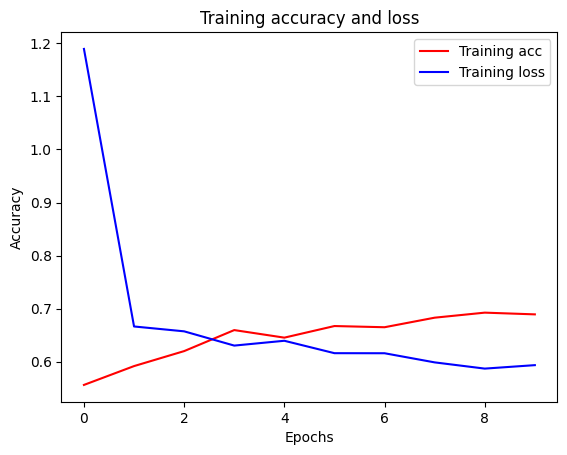

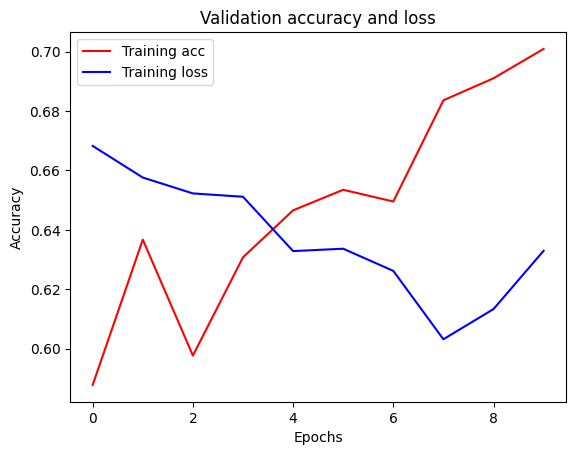

In [21]:
graphs(history)

64/64 [==============================] - 8s 126ms/step


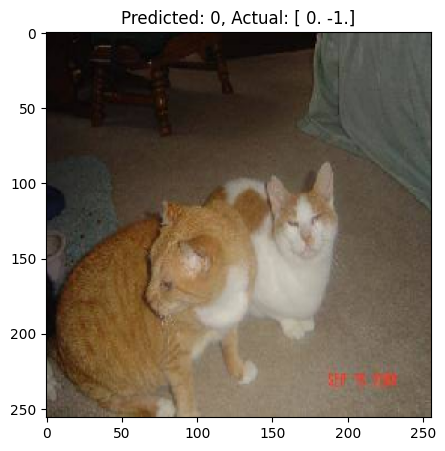

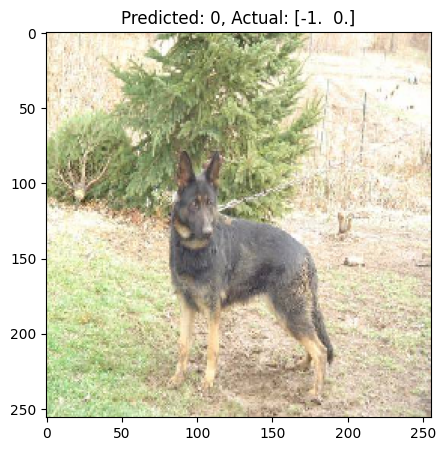

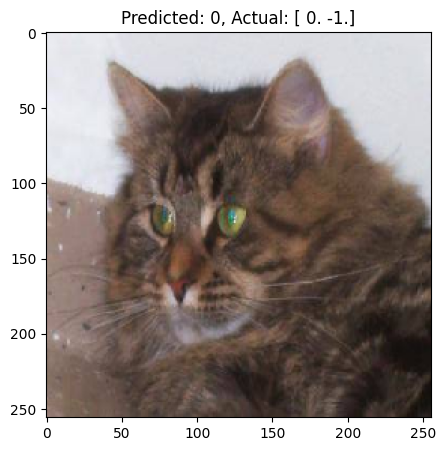

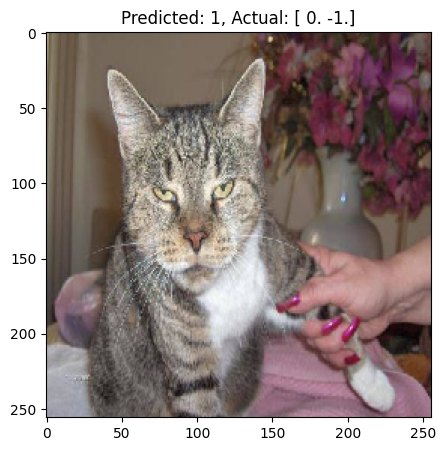

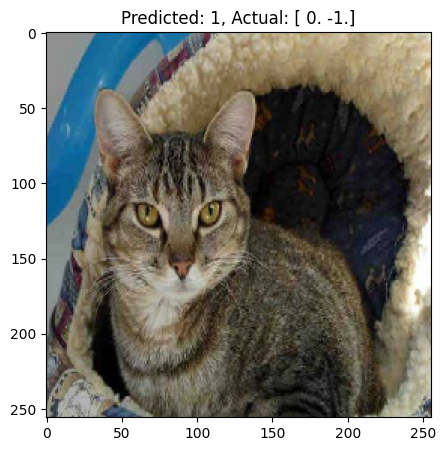

In [22]:
predict(model)

In [23]:
import gc
gc.collect()


19534

# Inception_V3

In [24]:
pretrained_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
pretrained_model.trainable = False

inputs = tf.keras.Input(shape=(128, 128, 3))
x = pretrained_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 2048)              16779264  
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                            

In [ ]:
model.fit(train_generator, validation_data=test_generator, epochs=10)

In [ ]:
import numpy as np
import csv

predictions = model.predict(test_generator)

file_names = test_generator.filenames

with open('predictions_inc_V3.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(['ID', 'LABEL'])

  for i in range(len(predictions)):
    writer.writerow([file_names[i].split('.')[0][5:], np.argmax(predictions[i])])


In [ ]:
predict(model)

In [ ]:
graphs(history)